In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


The Demon Algorithm
===================

The demon algorithm is a simple way to simulate the random exchange of energy between component of a system over time. Here's the basic idea:

* Suppose we have a demon..

    1 Make a small change to the system.

    2 Compute $\Delta E$. If $\Delta E<0$ give it to the “demon” and accept the change.

    3 If $\Delta E>0$ and the demon has that much energy available, accept the change and take the energy from the demon.
    
    4 If the demon doesn’t have that much energy, then reject the change.
    
Example Problem
---------------

Compute the height distribution of nitrogen molecules near the Earth's surface. Assume T=const. and that the weight of a molecule is constant.

$$ PE(y) = m g y $$

so $\Delta E$ is just $m g \Delta y$.

Below is a sample program that uses the demon algorithm to approach this problem.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


0.674649334809
(array([   8.,   32.,   88.,  186.,  252.,  213.,  137.,   65.,   17.,    2.]), array([-3.11484925, -2.46283981, -1.81083036, -1.15882092, -0.50681148,
        0.14519796,  0.7972074 ,  1.44921684,  2.10122628,  2.75323572,
        3.40524517]), <a list of 10 Patch objects>)


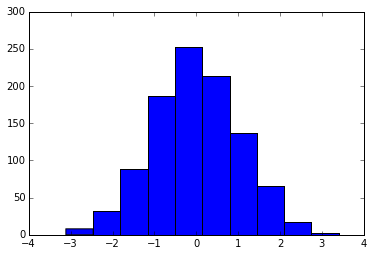

In [9]:
print rand()
print hist(normal(size=1000))

(array([  92.,  117.,  105.,  110.,  106.,  101.,   89.,   94.,   97.,   89.]),
 array([  7.61803675e-06,   1.99370212e-01,   3.98732805e-01,
          5.98095399e-01,   7.97457993e-01,   9.96820586e-01,
          1.19618318e+00,   1.39554577e+00,   1.59490837e+00,
          1.79427096e+00,   1.99363355e+00]),
 <a list of 10 Patch objects>)

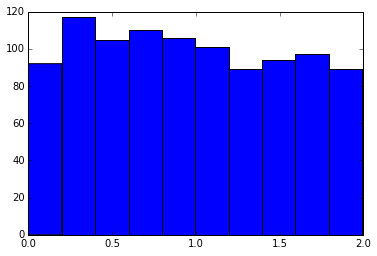

In [5]:
m=28*1.67e-27
g=9.8
kb=1.67e-23
demonE = 0.0
N=10000  # number of molecules
M=400000 # number of iterations
h=20000.0 # height scale

def setup(N=100,L=1.0):
    y=L*rand(N)     # put N particles at random heights (y) between 0 and L
    return y

yarray = setup(N=1000,L=2.0)
hist(yarray)


77.27975 percent accepted
Averge height=9994.989m


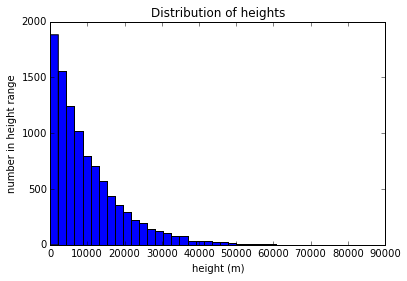

In [10]:
def shake(y, demonE, delta=0.1):
    """
    Pass in the current demon energy as an argument.
    delta is the size of change in y to generate, more or less.
    randomly choose a particle, change it's position slightly (around delta)
    """
    ix = int(rand()*len(y))
    deltaY = delta*normal()
    deltaE = deltaY*m*g
    accept=False
    if deltaE < demonE and (y[ix]+deltaY>0):
        demonE -= deltaE  # take the energy from the demon, or give it if deltaE<0.
        y[ix] += deltaY
        accept=True
        
    return demonE, accept


y = setup(N,L=h)

acceptCount = 0

demonList = []
for i in range(M):
    demonE,accept = shake(y, demonE, delta=0.2*h)
    demonList.append(demonE)
    if accept:
        acceptCount += 1

title("Distribution of heights")
xlabel("height (m)")
ylabel("number in height range")
hist(y,bins=40)
print 100.0*acceptCount/M, "percent accepted"
print "Averge height=%4.3fm" % (y.sum()/len(y),)

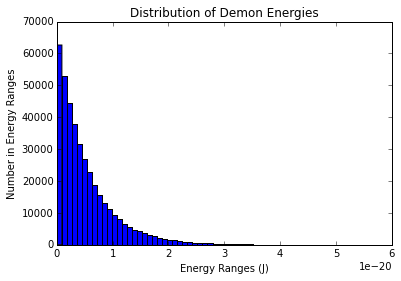

In [13]:
title("Distribution of Demon Energies")
xlabel("Energy Ranges (J)")
ylabel("Number in Energy Ranges")
ns, bins, patches = hist(demonList, bins=60)

Demonic Thermometer
====================

You can easily see that the demon acts like an small thermometer. According to the Maxwell-Boltzmann distribution the energy distribution of the demon's energy should go like:

$$P(E) = P_0 e^{-E/k_B T}$$

Where $P_0$ is the probability of having an energy of zero. (Actually, it turns out it's also just a normalization constant that's determined by the requirement that the total probability to have any energy is exactly 1). The histogram of demon energies tells us the number of times the demon have various values of energy during the calculation. This is proportional to the probability that the demon had various energies. We can fit that probability to an exponential curve (or the log of the probability to a straight line) and from the slope of the line deduce the temperature!

See below how the code does exactly this.


slope= -1.87089465865e+20 +/- 6.86108118984e+17
intercept= 11.118920962 +/- 0.00520597593149
Temperature= 320.062058246 +/- 1.17375489703 K


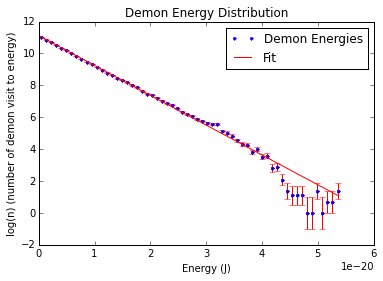

In [14]:
from scipy.optimize import curve_fit

def fLinear(x, m, b):
    return m*x + b

energies = (bins[:-1]+bins[1:])/2.0
xvals = array(energies)  # fit log(n) vs. energy
yvals = log(array(ns))
sig = 1.0/sqrt(array(ns))

#
# make initial estimates of slope and intercept.
#

m0 = (yvals[-1]-yvals[0])/(xvals[-1]-xvals[0])
b0 = yvals[0]-m0*xvals[0]

popt, pcov = curve_fit(fLinear, xvals, yvals, p0=(m0, b0), sigma=sig)

m=popt[0]          # slope
dm=sqrt(pcov[0,0]) # sqrt(variance(slope))
b=popt[1]          # int
db=sqrt(pcov[1,1]) # sqrt(variance(int))
Temp=-1.0/(m*kb)   # temperature
dT = abs(dm*Temp/m)# approx uncertainty in temp

print "slope=", m, "+/-", dm 
print "intercept=", b, "+/-", db
print "Temperature=", Temp, "+/-", dT, "K"
title("Demon Energy Distribution")
xlabel("Energy (J)")
ylabel("log(n) (number of demon visit to energy)")
errorbar(xvals, yvals, sig, fmt='r.')
plot(xvals,yvals,'b.',label="Demon Energies")
plot(xvals,fLinear(xvals, m, b),'r-', label="Fit")
legend()

Project 5: Velocity distribution in a 1-D gas
=============================================

For project 5 use the above example as a starting point to investigate the distribution of velocities of nitrogen molecules in a 1D gas. Start the velocities out in some random distribution, then each 'step' should bump one molecule up or down in energy randomly. Use the demon algorithm to exchange energy between the system and the demon. Use the same strategy to show a final distribution of velocities and a corresponding temperature.